# Stock and Crypto Currency Correlation analysis
#### Be advised this is an intersting project that I did to expand my knowledge on different currencies. It is not in any way financial advice to be acted on. I recommend that you also do your own research before investing.

In [218]:
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt


#Start of time frame from 4 years ago up until today
start = dt(2018,1,1)
now = dt.now()
#Stock tickers
#If you want to use this project you can add your own stock tickers, just make sure they exist in the time frame
tickers = ["FB", "NVDA", "MSFT", "TSLA", "CCL", "SILVER-USD", "ADBE", "GOOGL", "XOM", "XLE"]
colnames = []

for ticker in tickers:
    data = pdr.get_data_yahoo(ticker, start, now)
    if len(colnames) == 0:
        #Take the closest adjusted price and copy it
        combined = data[['Adj Close']].copy()
    else:
        combined = combined.join(data['Adj Close'])
    #Append to the colnames to know which stock we already added
    colnames.append(ticker)
    combined.columns = colnames
    
print(combined)

                    FB        NVDA        MSFT        TSLA        CCL  \
Date                                                                    
2018-01-02  181.419998   49.380798   81.530235   64.106003  61.440414   
2018-01-03  184.669998   52.630749   81.909653   63.450001  61.578476   
2018-01-04  184.330002   52.908176   82.630577   62.924000  61.532452   
2018-01-05  186.850006   53.356537   83.655052   63.316002  61.026203   
2018-01-08  188.279999   54.991413   83.740425   67.281998  60.796097   
...                ...         ...         ...         ...        ...   
2022-02-17  207.710007  245.070007  290.730011  876.349976  22.420000   
2022-02-18  206.160004  236.419998  287.929993  856.979980  22.170000   
2022-02-22  202.080002  233.899994  287.720001  821.530029  21.510000   
2022-02-23  198.449997  223.869995  280.269989  764.039978  20.209999   
2022-02-24  207.600006  237.479996  294.589996  800.770020  20.580000   

            SILVER-USD        ADBE        GOOGL   

We get the results above from the **Yahoo Finacne API**.
We can see the Dates and the price of the stocks in the Ticker list we created.


Lets try to visualize the results without setting the scale to logarithmic.

<function matplotlib.pyplot.show(close=None, block=None)>

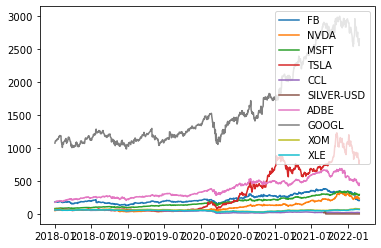

In [219]:
for ticker in tickers:
    plt.plot(combined[ticker], label=ticker)
    
plt.legend(loc="upper right")
plt.show

Problem is that some stocks have a much higher price than others and the default scale makes it difficult to spot the changes.
We don't see an analysis of the movement in the above graph but just a visualization of price changes through time.
Before changing the scale, let's analyze the changes in percentage.

In [220]:
corr_data = combined.pct_change()
print(corr_data)

                  FB      NVDA      MSFT      TSLA       CCL  SILVER-USD  \
Date                                                                       
2018-01-02       NaN       NaN       NaN       NaN       NaN         NaN   
2018-01-03  0.017914  0.065814  0.004654 -0.010233  0.002247         NaN   
2018-01-04 -0.001841  0.005271  0.008801 -0.008290 -0.000747         NaN   
2018-01-05  0.013671  0.008474  0.012398  0.006230 -0.008227         NaN   
2018-01-08  0.007653  0.030641  0.001021  0.062638 -0.003771         NaN   
...              ...       ...       ...       ...       ...         ...   
2022-02-17 -0.040778 -0.075591 -0.029282 -0.050943 -0.038181   -0.000396   
2022-02-18 -0.007462 -0.035296 -0.009631 -0.022103 -0.011151    0.000368   
2022-02-22 -0.019790 -0.010659 -0.000729 -0.041366 -0.029770   -0.000212   
2022-02-23 -0.017963 -0.042882 -0.025893 -0.069979 -0.060437   -0.000523   
2022-02-24  0.046107  0.060794  0.051094  0.048073  0.018308    0.003626   

           

Now we can set the scale to "Logarithmic" for a better visualization. 

<function matplotlib.pyplot.show(close=None, block=None)>

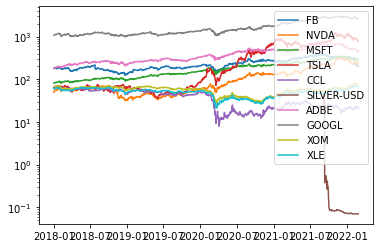

In [221]:
plt.yscale("log")
for ticker in tickers:
    plt.plot(combined[ticker], label=ticker)
    
plt.legend(loc="upper right")
plt.show

Let's see the fluctating changes in percentages again.

Before we get into analysing the whole data set. Let's see an intersting case of the data being used.

In [222]:
start = dt(2018,1,1)
now = dt.now()
#Stock tickers
#If you want to use this project you can add your own stock tickers, just make sure they exist in the time frame
chips = ["GOLD", "BAC", "KO", "AXP", "FB"]
colnames_chip = []

for chip in chips:
    data_chip = pdr.get_data_yahoo(chip, start, now)
    if len(colnames_chip) == 0:
        #Take the closest adjusted price and copy it
        combined_chip = data_chip[['Adj Close']].copy()
    else:
        combined_chip = combined_chip.join(data_chip['Adj Close'])
    #Append to the colnames to know which stock we already added
    colnames_chip.append(chip)
    combined_chip.columns = colnames_chip
    
print(combined_chip)

                 GOLD        BAC         KO         AXP          FB
Date                                                               
2018-01-02  14.118426  27.429277  39.993103   93.103218  181.419998
2018-01-03  13.932660  27.337542  39.905277   93.677246  184.669998
2018-01-04  13.960526  27.695316  40.467323   95.235359  184.330002
2018-01-05  13.886218  27.823744  40.458538   95.452568  186.850006
2018-01-08  13.691160  27.631104  40.397072   94.574356  188.279999
...               ...        ...        ...         ...         ...
2022-02-17  23.230000  46.070000  62.119999  195.710007  207.710007
2022-02-18  23.139999  45.959999  62.540001  194.880005  206.160004
2022-02-22  22.760000  45.560001  62.279999  192.440002  202.080002
2022-02-23  22.830000  44.779999  61.590000  188.949997  198.449997
2022-02-24  22.520000  43.590000  60.509998  188.339996  207.600006

[1045 rows x 5 columns]


In [223]:
chip_data = combined_chip.pct_change().corr(method="pearson")
print(chip_data)

          GOLD       BAC        KO       AXP        FB
GOLD  1.000000 -0.007250  0.122751  0.062911  0.130455
BAC  -0.007250  1.000000  0.522988  0.798516  0.343653
KO    0.122751  0.522988  1.000000  0.567538  0.261126
AXP   0.062911  0.798516  0.567538  1.000000  0.342799
FB    0.130455  0.343653  0.261126  0.342799  1.000000


<AxesSubplot:>

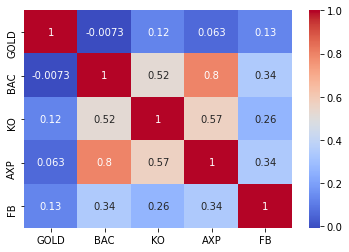

In [224]:
sns.heatmap(chip_data, annot=True, cmap="coolwarm")

Now let's figure out the correlation.
###### Guidelines:
____
1. The warmer it gets the more correlation we have, the colder it gets the less correlation exists.
2. If the number becomes negative, it means the stocks have opposite correlation.

We can see the heat area, that I like to call the "Hot Square". The Stocks Bank of America, and American Express are closely correlated with a correlation point of 0.8
We can aslo see a how a relitively nuetral stock like Facebook correlates in the diagram above.
Gold on the other hand, has a negative correlation with BA(Bank of America), which means in the time line of approximately 4 years, Gold and BA have been acting opposite to some extent.

###### Now we go back to our big analysis of stock correlation

In [225]:
corr_data = combined.pct_change().corr(method="pearson")
print(corr_data)

                  FB      NVDA      MSFT      TSLA       CCL  SILVER-USD  \
FB          1.000000  0.544919  0.623005  0.320350  0.237637    0.046594   
NVDA        0.544919  1.000000  0.698213  0.433488  0.253033    0.017707   
MSFT        0.623005  0.698213  1.000000  0.437733  0.297573    0.027750   
TSLA        0.320350  0.433488  0.437733  1.000000  0.240487    0.093274   
CCL         0.237637  0.253033  0.297573  0.240487  1.000000    0.140425   
SILVER-USD  0.046594  0.017707  0.027750  0.093274  0.140425    1.000000   
ADBE        0.609455  0.677223  0.827071  0.433473  0.258574    0.027399   
GOOGL       0.660823  0.635256  0.793917  0.368493  0.350311    0.088688   
XOM         0.279281  0.304070  0.365229  0.203892  0.534505    0.034239   
XLE         0.318508  0.353061  0.420164  0.264265  0.625319    0.042199   

                ADBE     GOOGL       XOM       XLE  
FB          0.609455  0.660823  0.279281  0.318508  
NVDA        0.677223  0.635256  0.304070  0.353061  
MSFT

Now I'm going to plot a heat map using the correlation data above using seaborn. This graph will be used to figure put any existing correlation between he stocks.

<AxesSubplot:>

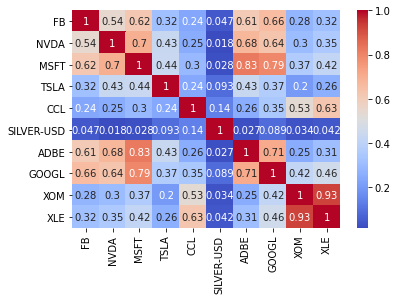

In [226]:
sns.heatmap(corr_data, annot=True, cmap="coolwarm")



Well firstly the stocks have correlation with themselves(Diagonal red "1" squares) -> if stock a rises then stock b rises.
A non-correlation wuld be 0 and a negative (-1) correlation means opposite correlation.
For example Apple  and Microsoft are highly correlated. 
Microsoft and Nvidia are highly correlated
Then Facebook and Microsoft to some degree are correlacted
And so on...

Great now lets see the correlatin between crypto currencies that Yahoo Finance offers.

In [249]:
start = dt(2018,1,1)
now = dt.now()
#Stock tickers
#If you want to use this project you can add your own stock tickers, just make sure they exist in the time frame
crypto = ["BTC", "ETH-USD", "DAG", "XRP-USD", "DOGE-USD", "SHIB-USD", "BCH-USD"]
colnames_c = []

for currency in crypto:
    data_c = pdr.get_data_yahoo(currency, start, now)
    if len(colnames_c) == 0:
        #Take the closest adjusted price and copy it
        combined_c = data_c[['Adj Close']].copy()
    else:
        combined_c = combined_c.join(data_c['Adj Close'])
    #Append to the colnames to know which stock we already added
    colnames_c.append(currency)
    combined_c.columns = colnames_c
    
print(combined_c)

                   BTC      ETH-USD   DAG   XRP-USD  DOGE-USD  SHIB-USD  \
Date                                                                      
2020-10-01  100.000000   353.205902  2.00  0.238249  0.002616  0.000000   
2020-10-02  100.000000   346.238922  2.00  0.234117  0.002583  0.000000   
2020-10-05   99.995003   353.956787  2.00  0.250816  0.002612  0.000000   
2020-10-06  100.029999   340.815857  2.00  0.245341  0.002611  0.000000   
2020-10-07   99.919998   341.808655  2.00  0.248539  0.002595  0.000000   
...                ...          ...   ...       ...       ...       ...   
2022-02-16   96.434097  3127.830078  3.55  0.839036  0.149095  0.000031   
2022-02-17   96.567200  2881.481934  3.55  0.767173  0.138552  0.000028   
2022-02-18   96.642303  2785.727539  3.50  0.785890  0.138768  0.000028   
2022-02-22   96.523903  2639.299316  3.65  0.722833  0.131553  0.000025   
2022-02-23   96.390404  2590.359619  3.75  0.698746  0.127846  0.000025   

               BCH-USD  

 Visualize the results for crypto currencies now

<function matplotlib.pyplot.show(close=None, block=None)>

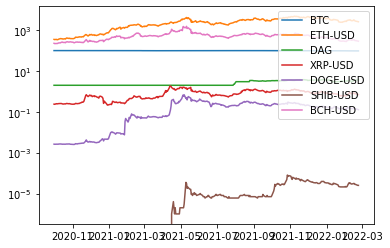

In [250]:
plt.yscale("log")
for currency in crypto:
    plt.plot(combined_c[currency], label=currency)
    
plt.legend(loc="upper right")
plt.show

In [251]:
corrcrypto_data = combined_c.pct_change().corr(method="pearson")
print(corrcrypto_data)

               BTC   ETH-USD       DAG   XRP-USD  DOGE-USD  SHIB-USD   BCH-USD
BTC       1.000000 -0.006226  0.050459 -0.014636  0.044080 -0.018600  0.009977
ETH-USD  -0.006226  1.000000  0.078652  0.485919  0.306567  0.174059  0.696685
DAG       0.050459  0.078652  1.000000  0.029324  0.004772  0.002552  0.039145
XRP-USD  -0.014636  0.485919  0.029324  1.000000  0.190738 -0.084170  0.539678
DOGE-USD  0.044080  0.306567  0.004772  0.190738  1.000000 -0.144305  0.324296
SHIB-USD -0.018600  0.174059  0.002552 -0.084170 -0.144305  1.000000  0.006260
BCH-USD   0.009977  0.696685  0.039145  0.539678  0.324296  0.006260  1.000000


<AxesSubplot:>

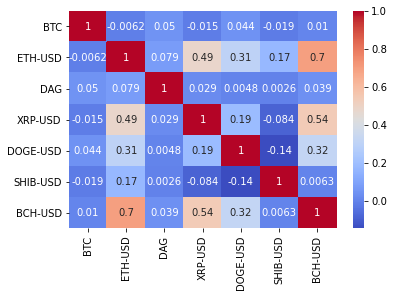

In [252]:
sns.heatmap(corrcrypto_data, annot=True, cmap="coolwarm")

The results are truly interesting. ETH and BTC have almost no correlation; but ETH and BCH are very much in correlation(0.7)
There is a 0.5 correlation with BCH and XRP and a less amount of correlation between HBAR(Which is considered an stable coin) and ETH
Other coins appear to have almost no correlation or very little like DOGE and XRP.

#### Now the question I always wanted to know the answer too, is there any correlation between major stocks and crypto currencies?

Lets find out

In [292]:
start = dt(2018,1,1)
now = dt.now()
#Stock tickers
#If you want to use this project you can add your own stock tickers, just make sure they exist in the time frame
stockyptos = ["TD", "BTC", "MS"]
colnames_cs = []

for stockypto in stockyptos:
    data_cs = pdr.get_data_yahoo(stockypto, start, now)
    if len(colnames_cs) == 0:
        #Take the closest adjusted price and copy it
        combined_cs = data_cs[['Adj Close']].copy()
    else:
        combined_cs = combined_cs.join(data_cs['Adj Close'])
    #Append to the colnames to know which stock we already added
    colnames_cs.append(currency)
    combined_cs.columns = colnames_cs
    
print(combined_cs)

              BCH-USD    BCH-USD    BCH-USD
Date                                       
2018-01-02  49.635490        NaN  46.721130
2018-01-03  49.854538        NaN  46.846462
2018-01-04  50.410641        NaN  47.562626
2018-01-05  50.848774        NaN  47.544716
2018-01-08  50.722385        NaN  47.347775
...               ...        ...        ...
2022-02-17  83.900002  96.567200  96.150002
2022-02-18  83.220001  96.642303  95.419998
2022-02-22  83.089996  96.523903  94.750000
2022-02-23  82.080002  96.390404  93.550003
2022-02-24  79.919998        NaN  91.809998

[1045 rows x 3 columns]


In [293]:
cs_data = combined_cs.pct_change().corr(method="pearson")
print(cs_data)

          BCH-USD   BCH-USD   BCH-USD
BCH-USD  1.000000 -0.217916  0.769898
BCH-USD -0.217916  1.000000 -0.153708
BCH-USD  0.769898 -0.153708  1.000000


<AxesSubplot:>

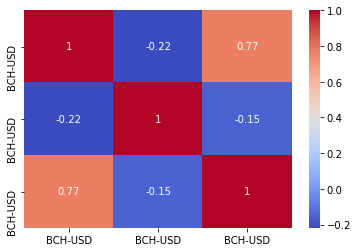

In [294]:
sns.heatmap(cs_data, annot=True, cmap="coolwarm")


Since stocks and Crypto Currencies are not in the same cluster in Yahoo finance the results shows up as BCH-USD all around.
However I have deciphered this and here are the results:  
**BTC has negative correlation with both TD and MS stock, and the correlation ratio is bigger then the negative numbers we saw with just stocks.**
So it appears at least in the case of BitCoin it is better to be mindful of this relation. 
In case of other crypto currencies this ratio could be less negative since ETH for example has it's own functionalities and value cluster.
